In [38]:
import matplotlib.pyplot as plt
import jax.numpy as jnp

The data used here is gotten manually from the cnn_decoder.ipynb notebook by running it with different settings. These are the settings that are kept the same:

BATCH_SIZE = 32
TRAINING_BATCHES = 200_000

CODE_DISTANCE = 3

INIT_LEARNING_RATE = 0
LEARNING_RATE = 1E-3
WARMUP_STEPS = 2_000
TRANSITION_STEP = 50_000
DECAY_RATE = 0.95

NUM_FILTERS = 8
CONV_LAYERS = [(NUM_FILTERS,2,1,0), (NUM_FILTERS,2,1,0)]
FC_LAYERS = [50, 2]
print(f"{NUM_FILTERS = }")

SEED = 16, 62, 85

DEFORMATION = jnp.zeros((CODE_DISTANCE, CODE_DISTANCE), dtype=jnp.int32).at[1::2, ::2].set(3).flatten().at[::2].set(2)

p, nu = .01, 500
ERROR_PROBS = jnp.array([
    1 / (2 * (nu + 1)) * p,
    1 / (2 * (nu + 1)) * p,
    nu / (nu + 1) * p,
])
ERROR_PROB_TRAINING_SCALE = # This setting was changed from between .5 and 10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


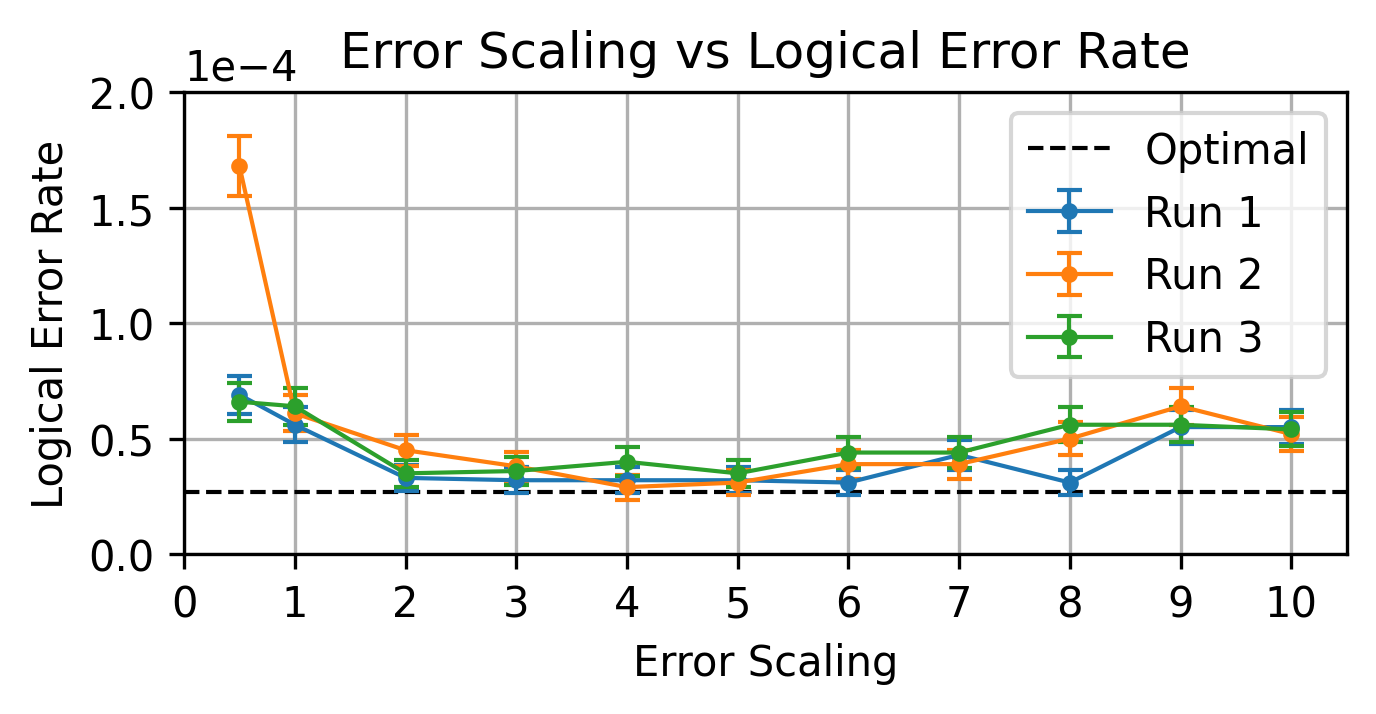

In [85]:
from scipy.stats import beta

# Pairs of numbers [error-scaling, logical-error-rate]
data = jnp.array([
    [.5, 6.9022180e-05, 1.6802550e-04, 6.5982340e-05],
    [1 , 5.6028366e-05, 6.0975550e-05, 6.4015390e-05],
    [2 , 3.3020973e-05, 4.5001507e-05, 3.4987926e-05],
    [3 , 3.2007694e-05, 3.8027763e-05, 3.6001205e-05],
    [4 , 3.2007694e-05, 2.9027462e-05, 3.9994717e-05],
    [5 , 3.2007694e-05, 3.0994415e-05, 3.4987926e-05],
    [6 , 3.0994415e-05, 3.8981438e-05, 4.3988228e-05],
    [7 , 4.2974950e-05, 3.8981438e-05, 4.3988228e-05],
    [8 , 3.0994415e-05, 5.0008297e-05, 5.6028366e-05],
    [9 , 5.5015087e-05, 6.4015390e-05, 5.6028366e-05],
    [10, 5.5015087e-05, 5.1975250e-05, 5.4001808e-05],
])

confidence = 95 # procent

plt.figure(figsize=(5,2), dpi=300)
plt.hlines([2.7000904e-05], [0], [11], ls='--', color='k', lw=1, label="Optimal")
# Calculate error bars using the beta distribution
for i in range(3):
    # alpha = data[:, i+1] * 1E6 + 1
    # beta_param = (1 - data[:, i+1]) * 1E6 + 1
    # lower_bounds = beta.ppf((1 - confidence / 100) / 2, alpha, beta_param)
    # upper_bounds = beta.ppf(1 - (1 - confidence / 100) / 2, alpha, beta_param)
    # error_bars = jnp.array([data[:, i+1] - lower_bounds, upper_bounds - data[:, 1]])
    # plt.errorbar(data[:, 0], data[:, i+1], yerr=error_bars, fmt='-o', lw=1, ms=3, capsize=3, label=f"Run {i}")
    plt.errorbar(data[:, 0], data[:, i+1], yerr=jnp.sqrt(data[:, i+1]*(1-data[:, i+1]) / 1E6), fmt='-o', lw=1, ms=3, capsize=3, label=f"Run {i+1}")
plt.legend()
plt.xlabel('Error Scaling')
plt.ylabel('Logical Error Rate')
# plt.yscale('log')
plt.title('Error Scaling vs Logical Error Rate')
plt.xlim(0, 10.5)
plt.ylim(0, .0002)
plt.xticks(range(11))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.grid(True)

plt.savefig('figs/error_scaling_vs_logical_error_rate.png', bbox_inches='tight')
plt.savefig('figs/error_scaling_vs_logical_error_rate.eps', bbox_inches='tight')

plt.show()